In [21]:
from config import *
import os
from glob import glob
import utils
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from PIL import Image


pred = glob(f"{RESULT_FOLDER}{os.sep}*.tiff")
labels = glob(f"{ALL_LABELS}{os.sep}*.tiff")

def get_pred(paths):
    filenames = list(map(lambda x: x.split(os.sep)[-1], paths))
    return list(filter(lambda x: x.split(os.sep)[-1] in filenames, pred))

valid_images = glob(f"{V_IMAGES}{os.sep}*.tiff")
valid_labels = glob(f"{V_LABELS}{os.sep}*.tiff")
valid_pred = get_pred(valid_images)

test_images = glob(f"{T_IMAGES}{os.sep}*.tiff")
test_pred = get_pred(test_images)

def get_arr(path, th=None):
    img = Image.open(path)
    arr = np.array(img.resize(IMG_SIZE, resample=Image.NEAREST))
    if th:
        arr[arr >= th] = 1
        arr[arr < th] = 0
    return arr

def plot(image_path, pred_path, label_path=None):
    name = image_path.split(os.sep)[-1]
    img = utils.normalize(get_arr(image_path))
    if label_path:
        true = get_arr(label_path)
    pred = get_arr(pred_path, th=0.8)
    
    plt.figure()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    ax1.imshow(img, cmap=plt.cm.binary.reversed())
    if label_path:
        ax2.imshow(true, cmap=plt.cm.binary.reversed())
    ax3.imshow(pred, cmap=plt.cm.binary.reversed())
    fig.suptitle(name)
    plt.grid(False)
    plt.show()


def plot_all(images, preds, labels=None):
    for i in range(10):
        label = None if labels is None else labels[i]
        plot(images[i], preds[i], label)

<Figure size 432x288 with 0 Axes>

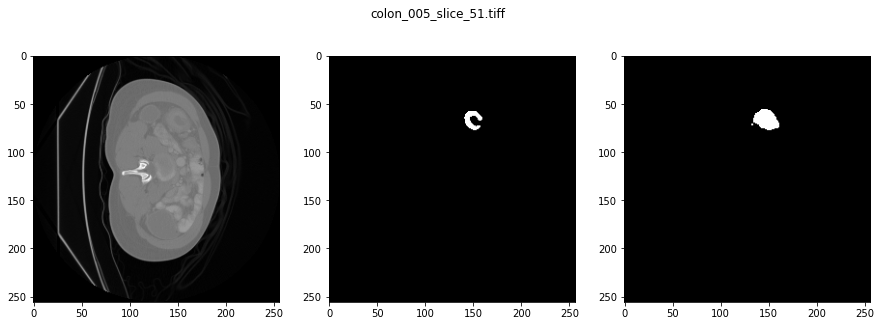

<Figure size 432x288 with 0 Axes>

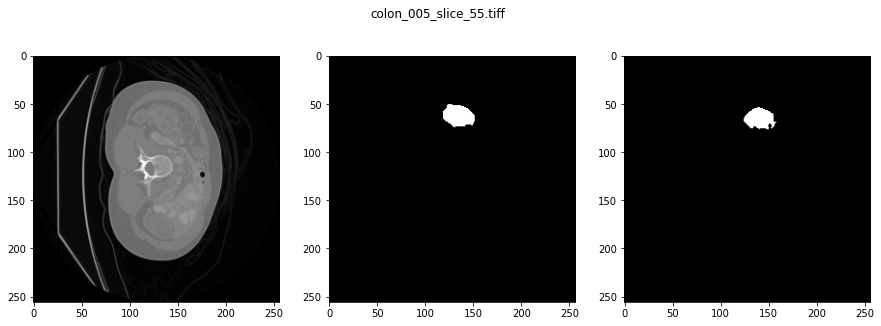

<Figure size 432x288 with 0 Axes>

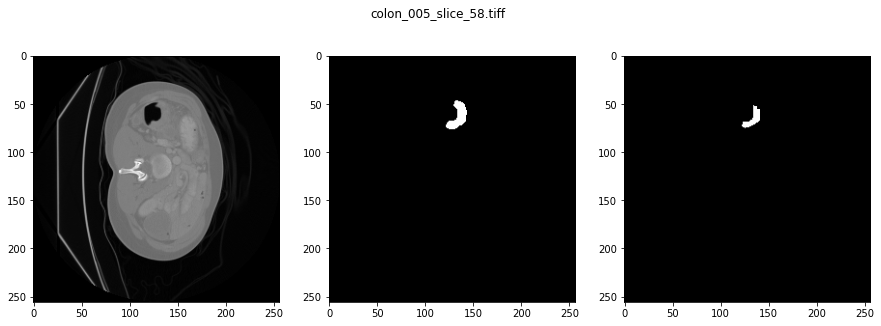

<Figure size 432x288 with 0 Axes>

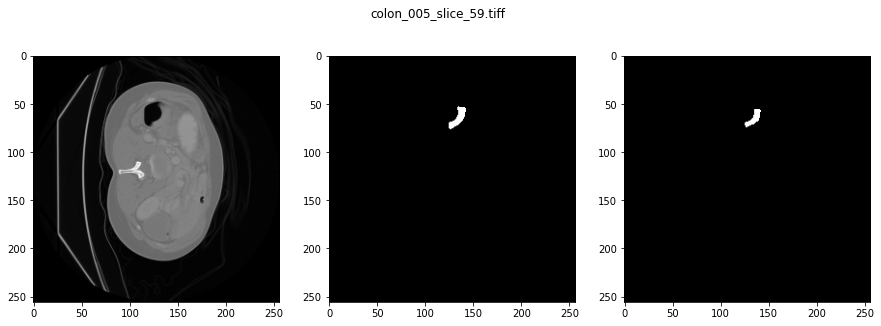

<Figure size 432x288 with 0 Axes>

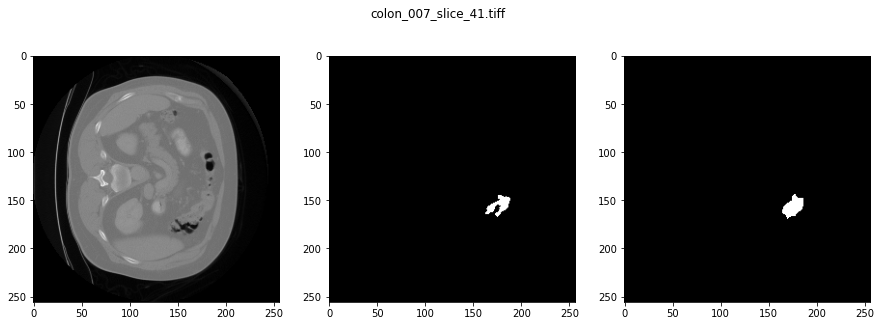

<Figure size 432x288 with 0 Axes>

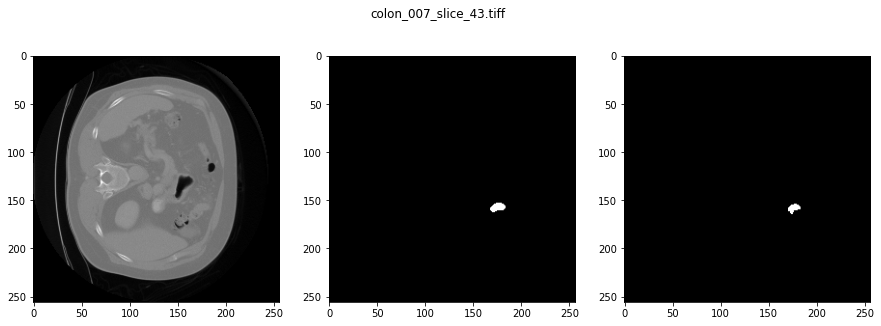

<Figure size 432x288 with 0 Axes>

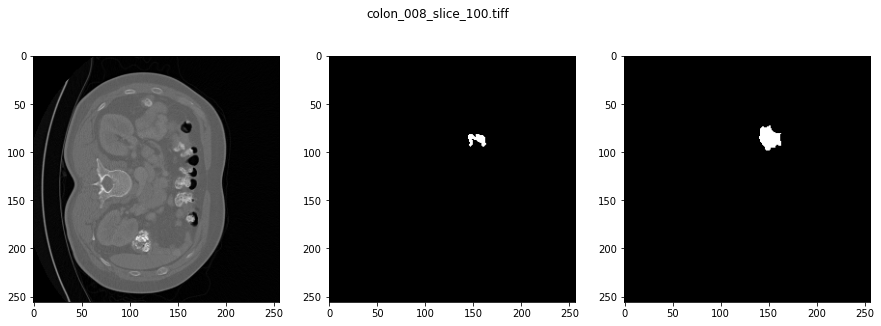

<Figure size 432x288 with 0 Axes>

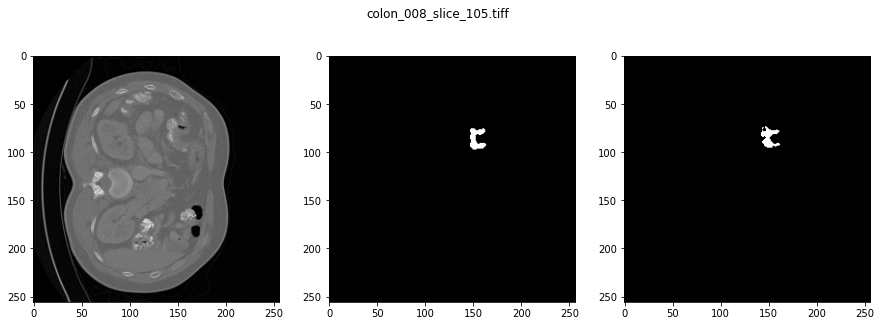

<Figure size 432x288 with 0 Axes>

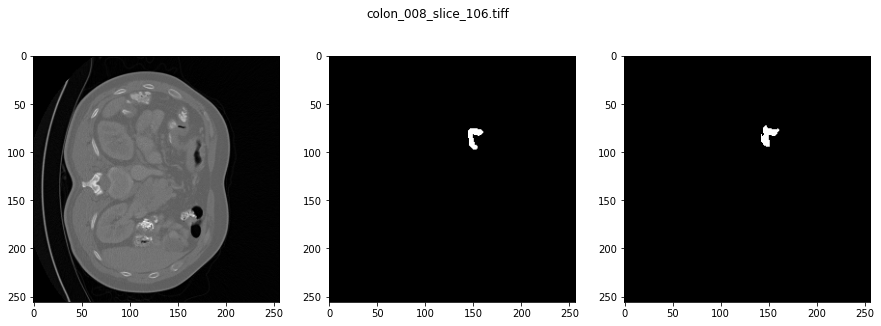

<Figure size 432x288 with 0 Axes>

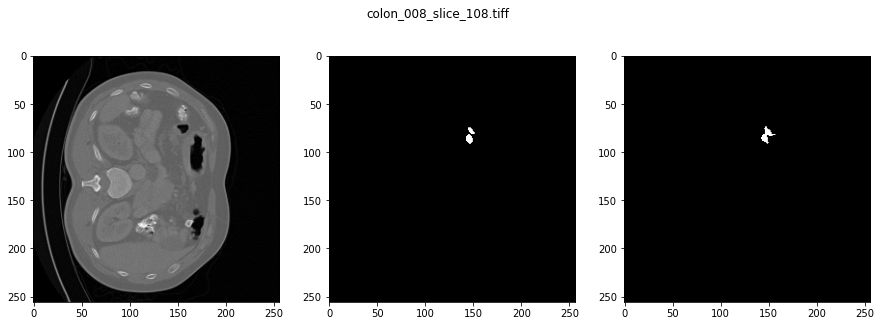

In [22]:
# validation set
plot_all(valid_images, valid_pred, valid_labels)

<Figure size 432x288 with 0 Axes>

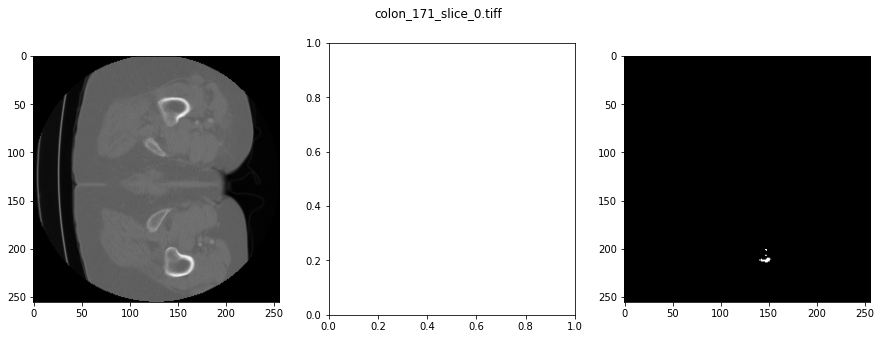

<Figure size 432x288 with 0 Axes>

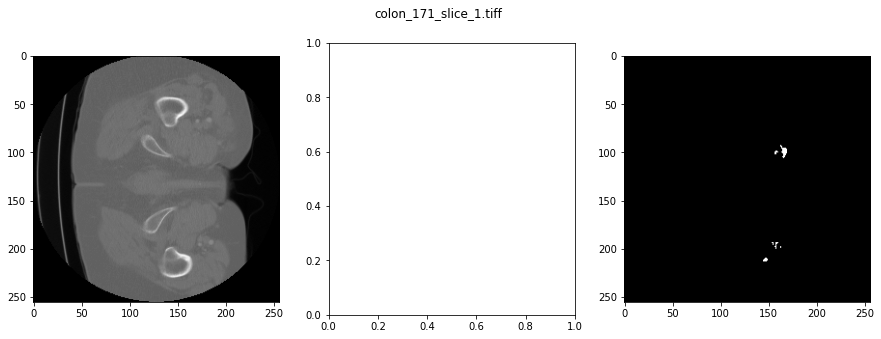

<Figure size 432x288 with 0 Axes>

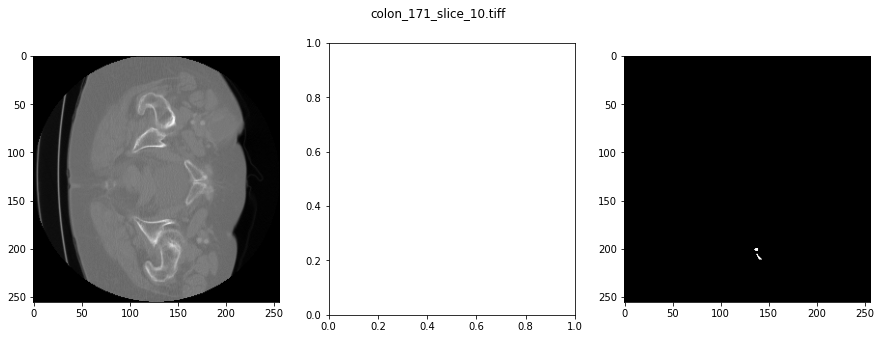

<Figure size 432x288 with 0 Axes>

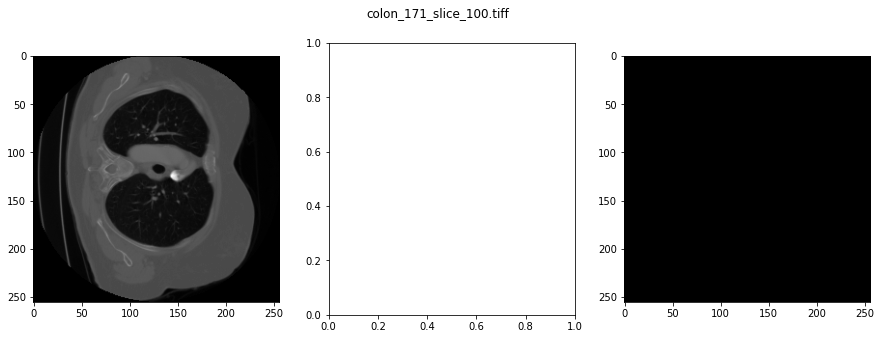

<Figure size 432x288 with 0 Axes>

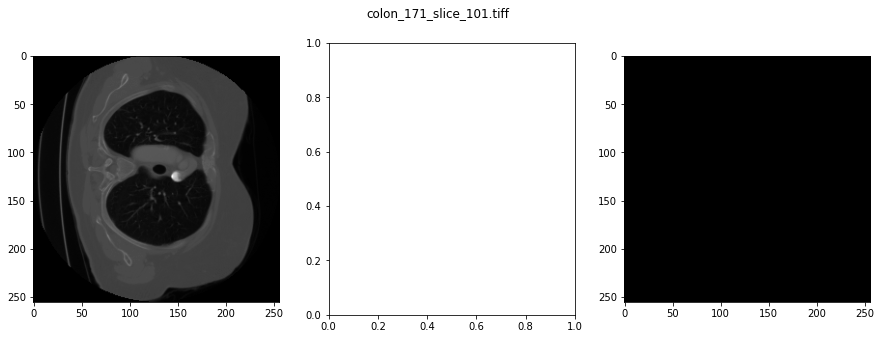

<Figure size 432x288 with 0 Axes>

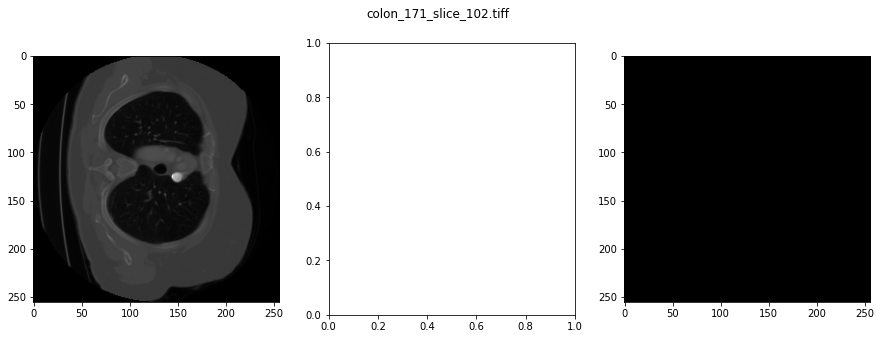

<Figure size 432x288 with 0 Axes>

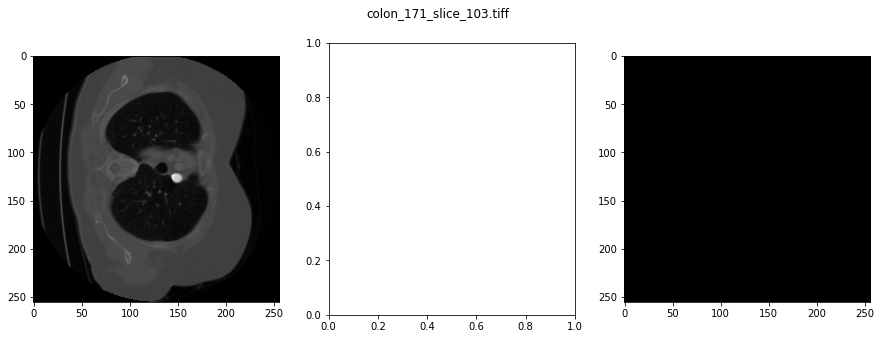

<Figure size 432x288 with 0 Axes>

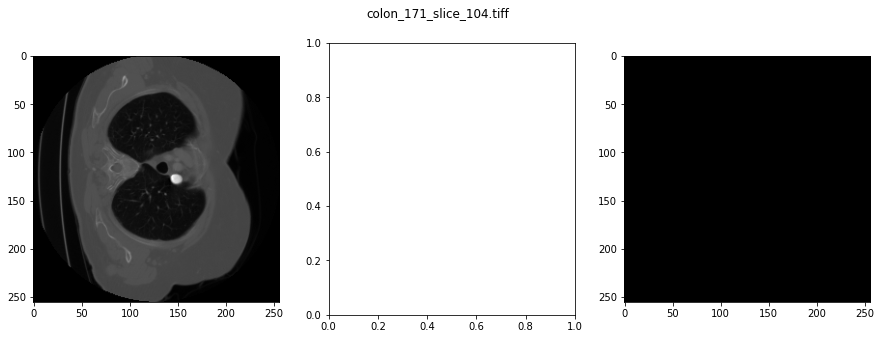

<Figure size 432x288 with 0 Axes>

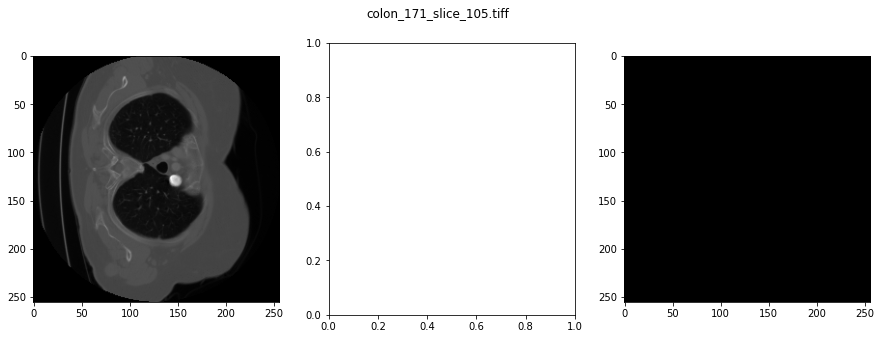

<Figure size 432x288 with 0 Axes>

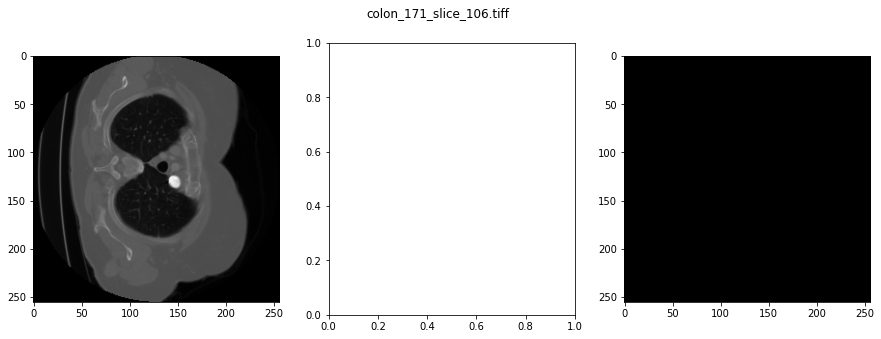

In [23]:
# test set
plot_all(test_images, test_pred)